# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Jiaming Yuan (jy729)

**ID**: 5393613

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Documents/Programming/Julia/BEE4750/hw/hw1-jiamingy5`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [4]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 Writeup

The error in the above code is that it sets the initial minimum value equal to 0 at the very beginning, and since 0 is less than all the values in the array, it returns 0 instead of values in the array. Instead, you should set the initial minimum value equal to the first value in the array so that all comparisons are made between values within the given array.

In [5]:
# my code
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if i == 1
            min_value = array[i]
        else
            if array[i] < min_value
                min_value = array[i]
            end
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95];
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [6]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

#### Problem 1.2 Writeup:

There is no "mean" function, so you need to sum up all the individual grades and divide it by the number of grades inputted. Also, the function shouldn't call on a specific array in its definition, but rather use the sample input "grades" in its code. Then, call the function class_average with student_grades as the input.

In [8]:
# my code
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
    average_grade = sum(grades)/length(grades)
    return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [9]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

#### Problem 1.3 Writeup:

The code above uses the zero function instead of the zeros function. The zeros function creates an array of zeros that is a given size, which is what the code intends to do.

In [10]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3)
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.382


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [11]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y) #checks whether v is a unique value
            append!(y, v) #if unique, add the value to output array y
        end
    end
    return y #y is output array that only contains unique values of the input array
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.


#### Problem 2 Writeup:

mystery_function appears to take an input array and returns a new array that contains the unique values in the input. I added comments to the code box containing 'mystery_function' above. Julia has a built-in function called 'unique' that returns an array containing all unique values of the input array.


### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.


#### Problem 3 Writeup:

Inside the compute_mean function, first initialize a variable to store the sum of the input values (I called this x). Then, iterate through all the values of the input vector v using the for loop from 1 to the length of v. Inside the for loop, add the current value of v, v[i], to the existing sum x. After summing up all the values, divide by the length of v to get the mean, which is then returned from the function.

In [42]:
# mean function
function compute_mean(v)
    x = 0
    for i in 1:length(v)
        x = x + v[i]
    end
    avg = x / length(v)
    return avg
end

random_vect = rand(Float64,10);
avg = compute_mean(random_vect);
random_vect = broadcast(-, random_vect, avg);
@show compute_mean(random_vect);
# although the result of compute_mean doesn't always exactly equal to zero, it's always very close

compute_mean(random_vect) = 0.0


0.0


### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

#### Problem 4 Writeup for labeling:

There are three flows from the plant that add up to a total of $100 m^3/day$. If $X1*C$ is the mass rate of YUK undergoing land treatment and $X2 *C$ is the mass rate undergoing chemical treatment, the mass rate undergoing direct disposal would be $(100-X1-X2) * C$. From land disposal, 20% of the YUK is discharged into Pristine Brook, so $0.2 * X1 * C$. From chemical disposal, the amount removed depends on the efficiency, which is $(1 - 0.005 * X2)$, so the amount discharged would be $0.005 * X2 * C$. All the YUK from direct disposal goes into Pristine Brook, so nothing changes there.

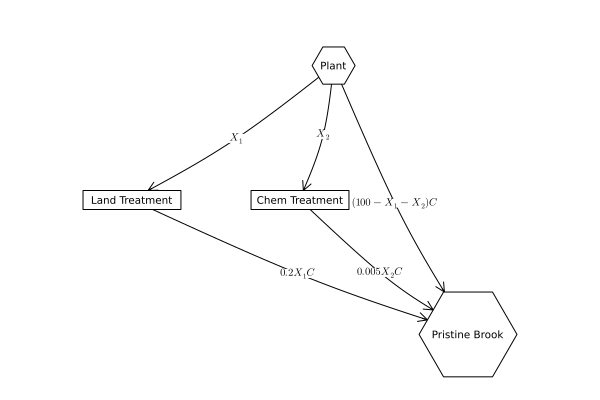

In [43]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"(100-X_1-X_2)C",(2, 4) => L"0.2X_1C",(3, 4) => L"0.005X_2C")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?


#### Problem 4 Writeup for function and plot:

The function YUK_amnt_cost requires inputs of X, Y, and C. X and Y are the mass rate of YUK entering land treatment and chemical treatment respectively, and the amount directly deposited, Z, is calculated inside the function. The amount of YUK deposited directly is calculated in the function. C is the concentration of YUK (which in this problem equals 1 kg/m3). Inside, the function calculates the amount of YUK released from each type of treatment as well as the cost for land and chemical treatment and returns each value individually. These are the equations that I used:

$Z = 100 - X - Y$

$landYUK = 0.2*X*C$

$landcost = X^2/20$

$efficiency = 1 - 0.005*Y$

$chemYUK = (1-efficiency)*Y*C$

$chemcost = 1.50*Y$

$ntYUK = Z*C$


For the plot, I sum up the amount of YUK released into Pristine Brook by each treatment method and also sum up the total treatment cost. I created vectors with arbitrarily chosen combinations of mass flow rates of YUK going to each treatment type to test the function and plotted the results. Out of the treatment combinations I tested, the cheapest ones that fulfill the YUK effluent standard are around $300. In order to find the most cost effective solution that still fulfills the standard, we would want to try and maximize the amount of YUK we can directly deposit first, and then maximize the amount that undergoes chemical treatment because it's less expensive than the land treatment.

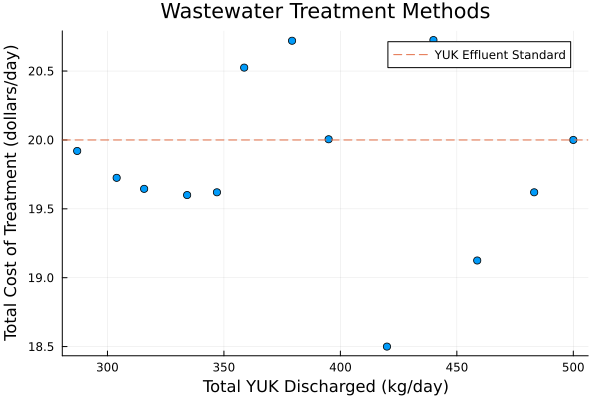

In [44]:
function YUK_amnt_cost(X, Y, C) #X, Y = flow rate of wastewater to land, chemical, and no treatment respectively; C = concentration of YUK discharged
    #calculating YUK deposited directly
    Z = 100 .- X .- Y
    #calculating amount YUK released and treatment cost for Land Treatment
    landYUK = 0.2 .* X .* C
    landcost = X.^2 ./ 20
    #Chemical Treatment
    efficiency = 1 .- 0.005 .* Y
    chemYUK = (1 .- efficiency) .* Y .* C
    chemcost = 1.50 .* Y
    #No Treatment
    ntYUK = Z .* C
    return (landYUK, landcost, chemYUK, chemcost, ntYUK)
end

#Test out different amounts sent to each treatment method 
X = [100, 98, 95, 93, 90, 87, 85, 82, 80, 78, 75, 73, 70]
Y = [0, 2, 5, 5, 10, 11, 12, 15, 18, 20, 23, 25, 28]
C = 1 #concentration is 1 kg/m3
landYUK, landcost, chemYUK, chemcost, ntYUK = YUK_amnt_cost(X,Y,1)
totalYUK = landYUK + chemYUK + ntYUK #sum the YUK released from each treatment type to get total YUK released
#totalYUK = sort(totalYUK)
totalcost = landcost + chemcost #sum the cost of all treatment types to get total cost
standard = zeros(length(totalcost))
for i in 1:length(totalcost)
    standard[i] = 20
end

#plot YUK discharged versus treatment cost
scatter(totalcost, totalYUK, title = "Wastewater Treatment Methods", label="")
hline!([20], label="YUK Effluent Standard",ls=:dash)
xlabel!("Total YUK Discharged (kg/day)")
ylabel!("Total Cost of Treatment (dollars/day)")



### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.